# Bibliotecas e Carregamento do DF

In [375]:
import pandas as pd
!pip install scikit-learn
!pip install seaborn
!pip install pandas scikit-learn matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\arthu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\arthu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\arthu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [376]:
df = pd.read_csv("streaming_data.csv")

# Data Understanding

In [377]:
df.columns

Index(['Age', 'Gender', 'Time_on_platform', 'Devices_connected',
       'Subscription_type', 'Num_streaming_services', 'Num_active_profiles',
       'Avg_rating', 'Churned', 'User_id'],
      dtype='object')

In [378]:
df.dtypes

Age                       float64
Gender                     object
Time_on_platform          float64
Devices_connected         float64
Subscription_type          object
Num_streaming_services    float64
Num_active_profiles         int64
Avg_rating                float64
Churned                   float64
User_id                    object
dtype: object

In [379]:
print(df.isnull().sum())

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64


# Data Preparation

In [380]:
df['Time_on_platform'].fillna(0, inplace=True)
df['Num_streaming_services'].fillna(0, inplace=True)
df['Churned'].fillna(0, inplace=True)
df['Avg_rating'].fillna(0, inplace=True)
df['Devices_connected'].fillna(0, inplace=True)

print(df.isnull().sum())

Age                       11277
Gender                    14516
Time_on_platform              0
Devices_connected             0
Subscription_type         25221
Num_streaming_services        0
Num_active_profiles           0
Avg_rating                    0
Churned                       0
User_id                       0
dtype: int64


C:\Users\arthu\AppData\Local\Temp\ipykernel_22144\3712087850.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time_on_platform'].fillna(0, inplace=True)
C:\Users\arthu\AppData\Local\Temp\ipykernel_22144\3712087850.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [381]:
df.dropna(subset=['Gender', 'Subscription_type', 'Age'], inplace=True)

print(df.isnull().sum())

Age                       0
Gender                    0
Time_on_platform          0
Devices_connected         0
Subscription_type         0
Num_streaming_services    0
Num_active_profiles       0
Avg_rating                0
Churned                   0
User_id                   0
dtype: int64


In [382]:
df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})

print(df['Churned'].value_counts())

Churned
No     29459
Yes     7056
Name: count, dtype: int64


In [383]:
df = df.astype({col: 'int' for col in df.select_dtypes(include=['float']).columns})

print(df.dtypes)

Age                        int64
Gender                    object
Time_on_platform           int64
Devices_connected          int64
Subscription_type         object
Num_streaming_services     int64
Num_active_profiles        int64
Avg_rating                 int64
Churned                   object
User_id                   object
dtype: object


# Modelagem dos Dados - Regressão Logística

In [384]:
df.columns

Index(['Age', 'Gender', 'Time_on_platform', 'Devices_connected',
       'Subscription_type', 'Num_streaming_services', 'Num_active_profiles',
       'Avg_rating', 'Churned', 'User_id'],
      dtype='object')

In [385]:
df = df.drop(columns=['User_id'])

In [386]:
# DECLARANDO TARGET E CATEGORICAS
X = df.drop(columns=['Churned'])
y = df['Churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [387]:
categorical_columns = ['Gender', 'Subscription_type'] 

In [388]:
encoder = OneHotEncoder()

# CODIFICADOR
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_columns)
    ], remainder='passthrough')  # 'remainder' mantém as colunas numéricas originais

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [389]:
# MODELO
model = RandomForestClassifier(random_state=42)  # Escolha o modelo
model.fit(X_train_encoded, y_train)  # Treinar o modelo

RandomForestClassifier(random_state=42)

In [390]:
y_pred = model.predict(X_test_encoded)

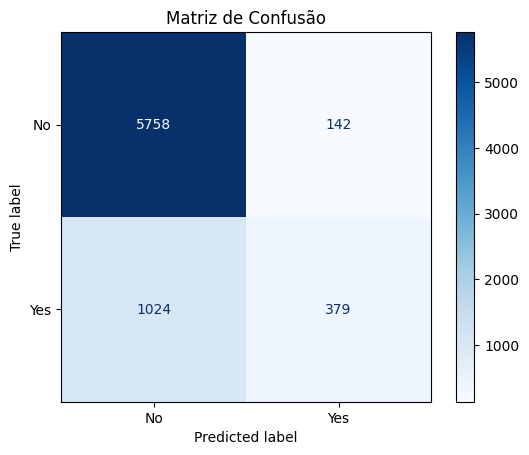

In [391]:
# MATRIZ CONFUSÃO
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

In [392]:
# METRICAS
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.85      0.98      0.91      5900
         Yes       0.73      0.27      0.39      1403

    accuracy                           0.84      7303
   macro avg       0.79      0.62      0.65      7303
weighted avg       0.83      0.84      0.81      7303



# Modelagem dos Dados - Tunning

In [393]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
}

grid_search = GridSearchCV(LogisticRegression(random_state=42, max_iter=1000), 
                           param_grid, 
                           cv=5, 
                           scoring='accuracy')  # Usando a acurácia como métrica
grid_search.fit(X_train_encoded, y_train)

C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: Conve

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [394]:
# MODELO
best_model = grid_search.best_estimator_

best_model.fit(X_train_encoded, y_train)

y_pred = best_model.predict(X_test_encoded)

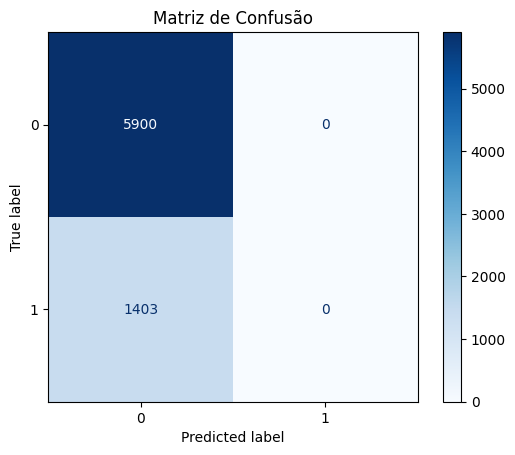

C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Relatório de Classificação:
               precision    recall  f1-score   support

          No       0.81      1.00      0.89      5900
         Yes       0.00      0.00      0.00      1403

    accuracy                           0.81      7303
   macro avg       0.40      0.50      0.45      7303
weighted avg       0.65      0.81      0.72      7303

Melhores Parâmetros Encontrados: {'C': 0.01, 'solver': 'liblinear'}


C:\Users\arthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [395]:
# PLOTAR
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.show()

print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
print("Melhores Parâmetros Encontrados:", grid_search.best_params_)

# Modelagem dos Dados - Random Forest

In [396]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

In [397]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Mantém as colunas numéricas sem transformação
)

In [398]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [399]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [400]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  # Número de árvores
    'classifier__max_depth': [None, 10, 20, 30],  # Profundidade máxima das árvores
    'classifier__min_samples_split': [2, 5, 10],  # Mínimo de amostras para dividir um nó
}


In [401]:
grid_search = GridSearchCV(estimator=pipeline, 
                           param_grid=param_grid, 
                           cv=5,  # Número de dobras para validação cruzada
                           scoring='accuracy',  # Métrica de avaliação
                           verbose=2, 
                           n_jobs=-1)  # Usar todos os núcleos disponíveis]

# Treinando o modelo com o Grid Search
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_

# Usar o melhor modelo para fazer previsões
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


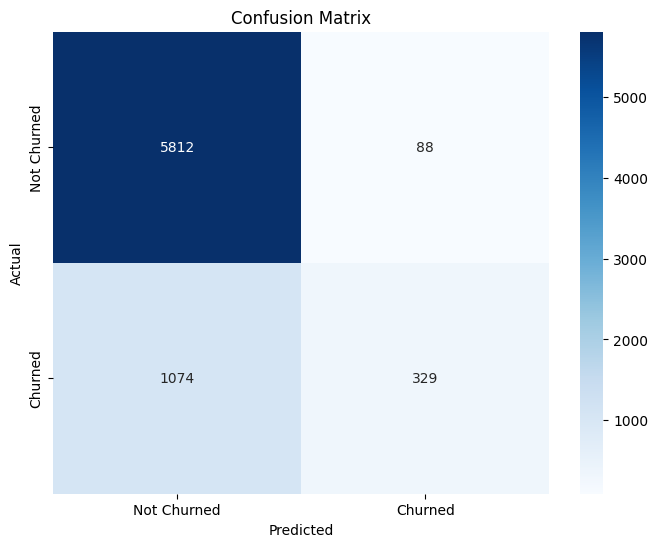

              precision    recall  f1-score   support

          No       0.84      0.99      0.91      5900
         Yes       0.79      0.23      0.36      1403

    accuracy                           0.84      7303
   macro avg       0.82      0.61      0.64      7303
weighted avg       0.83      0.84      0.80      7303



In [402]:
# Criar matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'], 
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Imprimir as métricas de desempenho
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))